In [3]:
import urllib
import json
import requests

In [4]:
json_data = requests.get('http://testresults.opnfv.org/test/api/v1/results?project=vsperf').json()


In [5]:
res = json_data['results']

In [6]:
import pandas as pd

In [7]:
df1 = pd.DataFrame(res)
sort_by_date = df1.sort_values('start_date')

In [8]:
sort_by_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 19 to 0
Data columns (total 12 columns):
_id             20 non-null object
build_tag       20 non-null object
case_name       20 non-null object
criteria        20 non-null object
details         20 non-null object
installer       20 non-null object
pod_name        20 non-null object
project_name    20 non-null object
scenario        20 non-null object
start_date      20 non-null object
stop_date       20 non-null object
version         20 non-null object
dtypes: object(12)
memory usage: 2.0+ KB


In [9]:
#Mapped 'Pass' to 1 and 'Fail' to 0 for visualisations
sort_by_date['criteria'] = sort_by_date['criteria'].map({'PASS' : 1, 'FAIL' : 0})


In [10]:
import matplotlib.pyplot as plt 
import numpy as np 

In [11]:
import datetime
sort_by_date['start_date'] = pd.to_datetime(sort_by_date['start_date'])

In [12]:
sort_by_date.set_index('start_date',inplace=True)

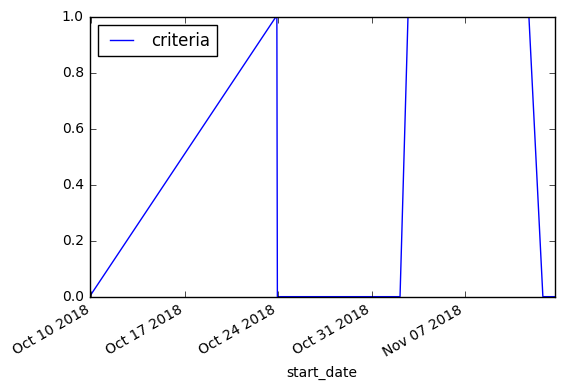

In [13]:
#Showing different visualisations with start date of test as index
sort_by_date.plot()
plt.show()

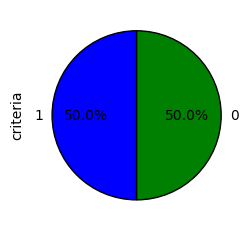

,0
Pass,1
Fail,0


In [14]:
df = sort_by_date
ax1 = plt.subplot(121, aspect='equal')
df.criteria.value_counts().plot(kind = 'pie',ax =ax1, autopct = '%1.1f%%',startangle=90)
plt.show()
entry = [1,0]
label = pd.DataFrame(entry,index=['Pass', 'Fail'])
label

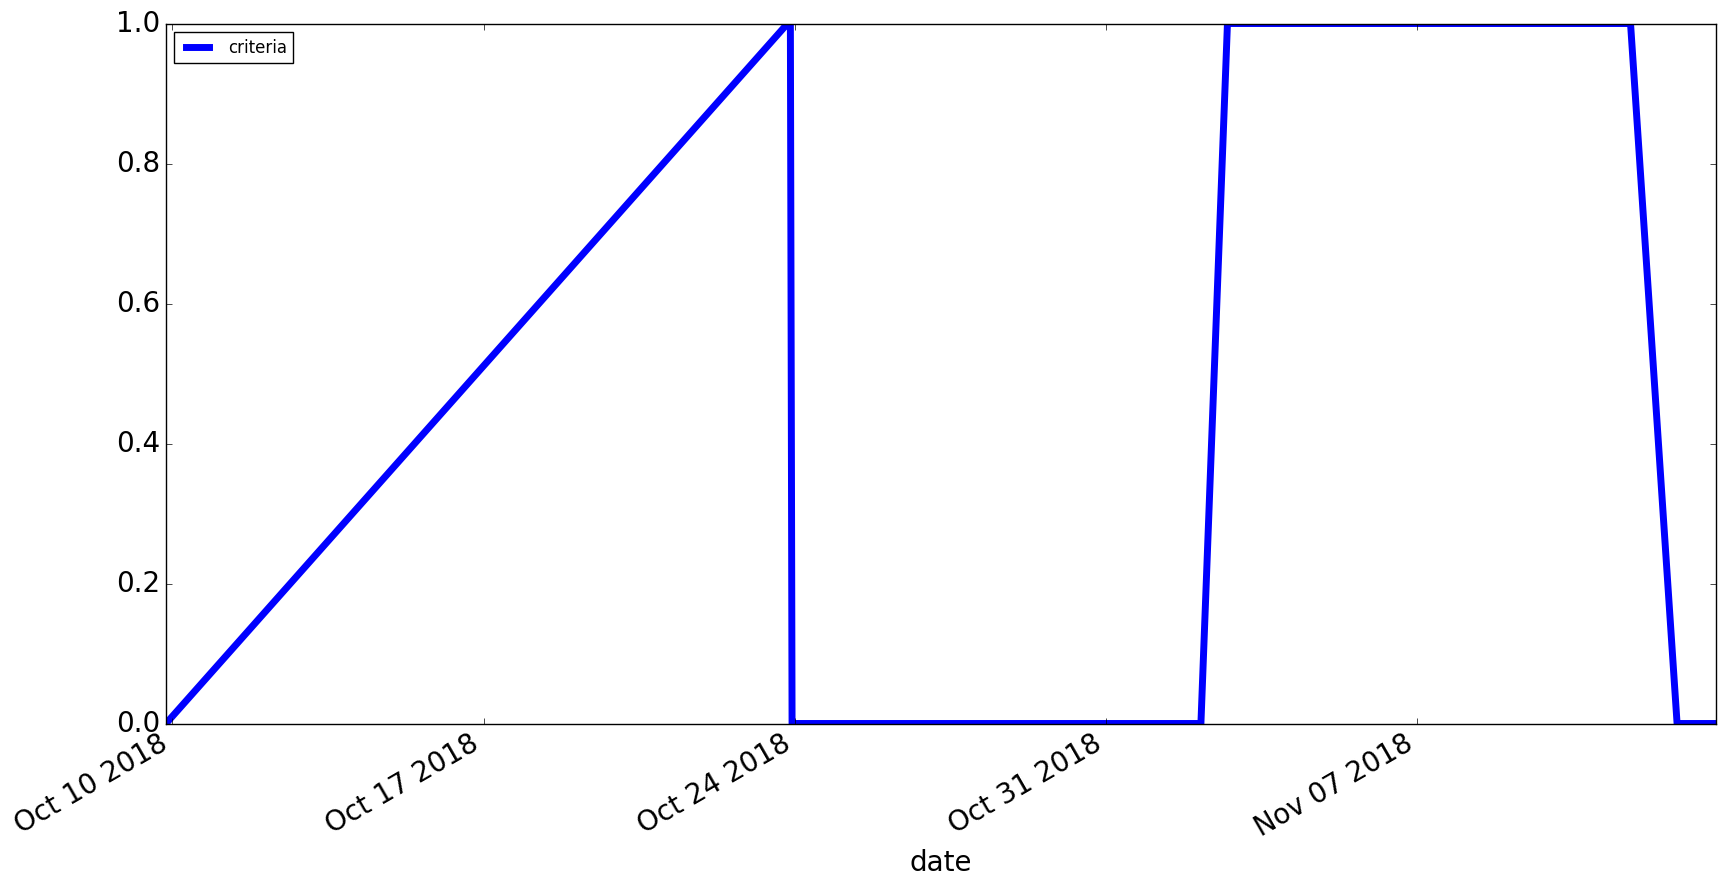

In [15]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('date', fontsize=20)
plt.show()

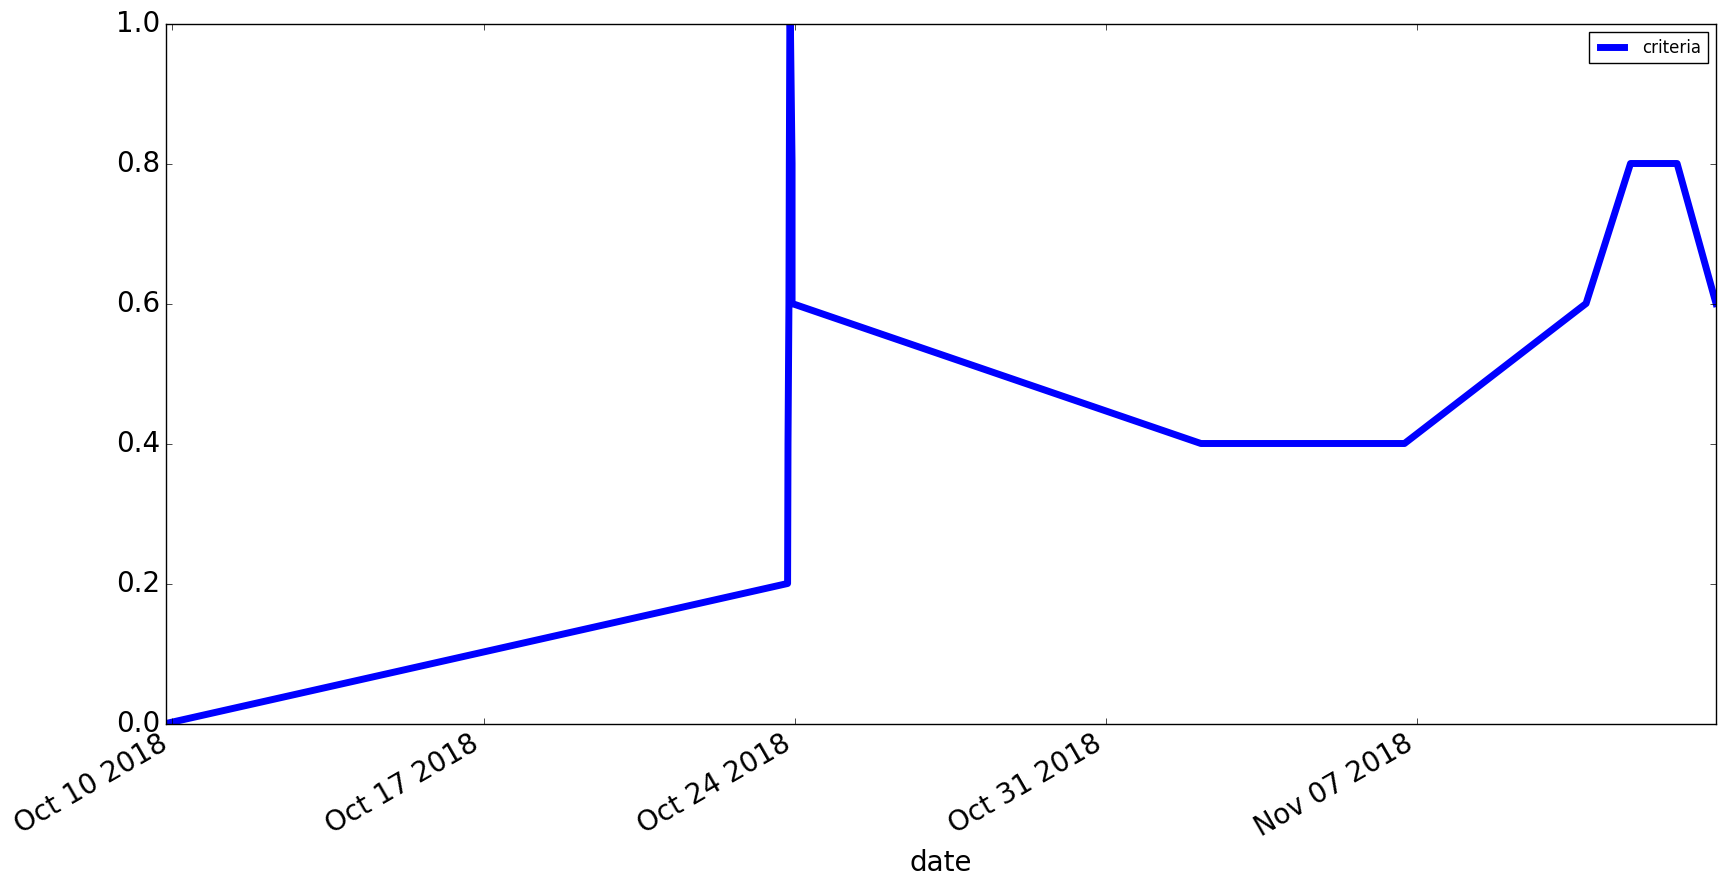

In [16]:
#Rolling mean visualtion for passed and failed tests
test = df[['criteria']]
test.rolling(5).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('date', fontsize=20)
plt.show()

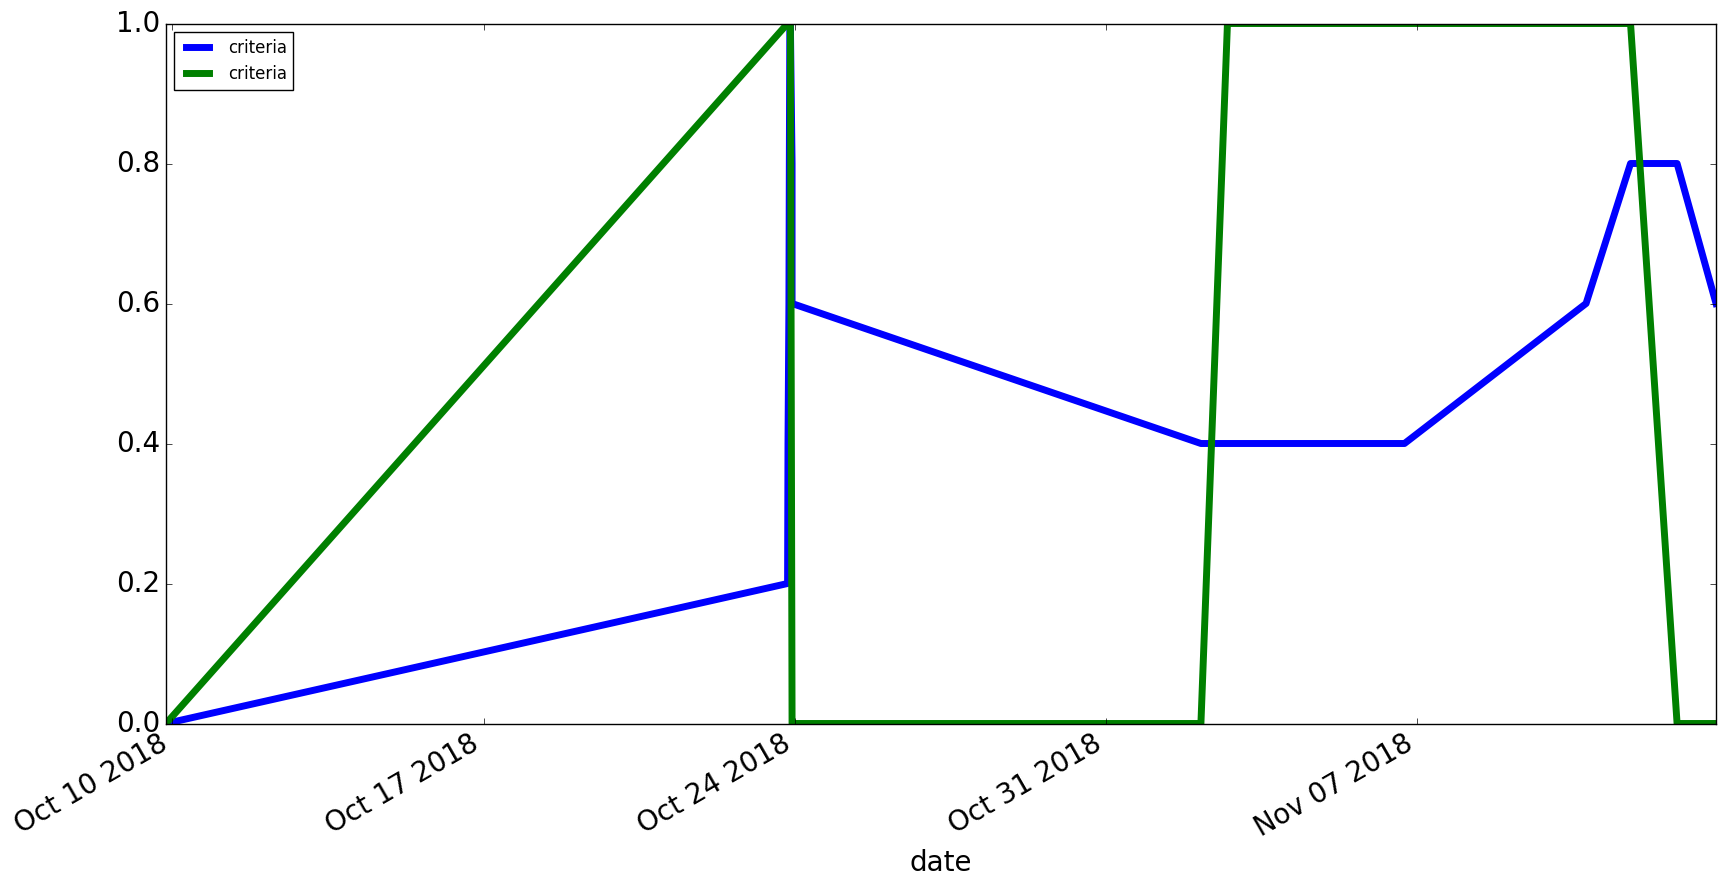

In [17]:
df_rm = pd.concat([df[['criteria']].rolling(5).mean(),df],axis=1)
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('date', fontsize=20)
plt.show()

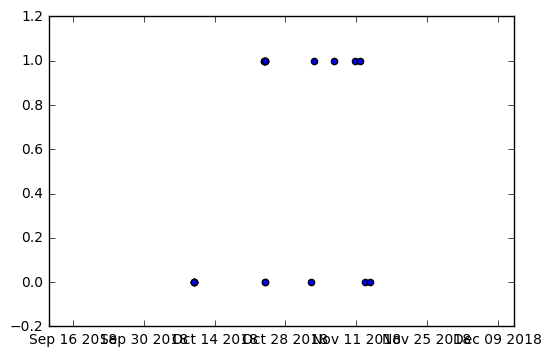

In [18]:
plt.scatter(df.index, df['criteria'])
plt.show()

In [19]:
df1 = pd.DataFrame(res)


In [20]:
import datetime
from datetime import timedelta
df1['start_date'] = pd.to_datetime(df1['start_date'])
df1['stop_date'] = pd.to_datetime(df1['stop_date'])

In [21]:
#Calculated Duration for each test and added a new column
df1['Duration'] = df1['stop_date'] - df1['start_date']
df1['Duration']=df1['Duration'].apply(lambda x : int(x.total_seconds())/60)
df1

,_id,build_tag,case_name,criteria,details,installer,pod_name,project_name,scenario,start_date,stop_date,version,Duration
0,5beb788c1b7bcc000e1362d8,jenkins-vswitchperf-daily-gambia-2,phy2phy_tput_ovsdpdkvhost,FAIL,"{'512': '', '64': '', '128': '', '1024': '', '...",fuel,intel-pod12,vsperf,vsperf,2018-11-13 17:10:57,2018-11-13 17:10:57,N/A,0.000000
1,5bea50da1b7bcc000e136196,jenkins-vswitchperf-daily-master-636,phy2phy_tput_ovsdpdkvhost,FAIL,"{'512': '', '64': '', '128': '', '1024': '', '...",fuel,intel-pod12,vsperf,vsperf,2018-11-12 20:09:18,2018-11-12 20:09:18,N/A,0.000000
2,5be8f27c1b7bcc000e135fd7,jenkins-vswitchperf-daily-master-635,phy2phy_tput_ovsdpdkvhost,PASS,"{'512': '4699201.955', '64': '23316600.027', '...",fuel,intel-pod12,vsperf,vsperf,2018-11-11 19:01:41,2018-11-11 19:14:23,OVS v2.8.1 DPDK v17.08,12.700000
3,5be7a0ee1b7bcc000e135deb,jenkins-vswitchperf-daily-master-634,phy2phy_tput_ovsdpdkvhost,PASS,"{'512': '4699201.955', '64': '23316599.926', '...",fuel,intel-pod12,vsperf,vsperf,2018-11-10 19:01:25,2018-11-10 19:14:08,OVS v2.8.1 DPDK v17.08,12.716667
4,5be23eba1b7bcc000e135487,jenkins-vswitchperf-daily-gambia-1,phy2phy_tput_ovsdpdkvhost,PASS,"{'512': '4699203.521', '64': '23316599.825', '...",fuel,intel-pod12,vsperf,vsperf,2018-11-06 17:01:10,2018-11-06 17:13:46,OVS v2.8.1 DPDK v17.08,12.600000
5,5bdcf1131b7bcc000e134d63,jenkins-vswitchperf-daily-master-633,phy2phy_tput_ovsdpdkvhost,PASS,"{'512': '4699204.712', '64': '23546936.935', '...",fuel,intel-pod12,vsperf,vsperf,2018-11-02 17:27:47,2018-11-02 17:41:06,OVS v2.8.1 DPDK v17.08,13.316667
6,5bdc244d1b7bcc000e134c1b,jenkins-vswitchperf-daily-master-632,phy2phy_tput_ovsdpdkvhost,FAIL,"{'512': '', '64': '', '128': '', '1024': '', '...",fuel,intel-pod12,vsperf,vsperf,2018-11-02 03:08:29,2018-11-02 03:08:29,N/A,0.000000
7,5bd004ff1b7bcc000e13399d,jenkins-vswitchperf-daily-master-631,pvvp_back2back_ovsdpdkvhost,FAIL,"{'512': '', '64': '', '128': '', '1024': '', '...",fuel,intel-pod12,vsperf,vsperf,2018-10-23 22:27:37,2018-10-23 22:27:37,N/A,0.000000
8,5bd004ff1b7bcc000e13399c,jenkins-vswitchperf-daily-master-631,pvvp_tput_ovsdpdkvhost,FAIL,"{'512': '', '64': '', '128': '', '1024': '', '...",fuel,intel-pod12,vsperf,vsperf,2018-10-23 22:27:37,2018-10-23 22:27:37,N/A,0.000000
9,5bd004ff1b7bcc000e13399b,jenkins-vswitchperf-daily-master-631,back2back_ovsdpdkvhost,PASS,"{'512': '70488721', '64': '25970', '128': '253...",fuel,intel-pod12,vsperf,vsperf,2018-10-23 20:15:59,2018-10-23 20:46:11,OVS v2.8.1 DPDK v17.08,30.200000


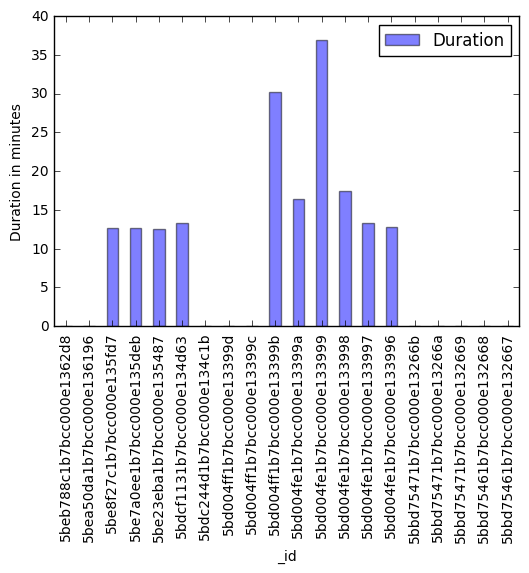

In [23]:
#Plotting bar graph for each _id and duration of test
df1.plot.bar(x = '_id', y = 'Duration', alpha = 0.5)
plt.ylabel('Duration in minutes')
plt.show()

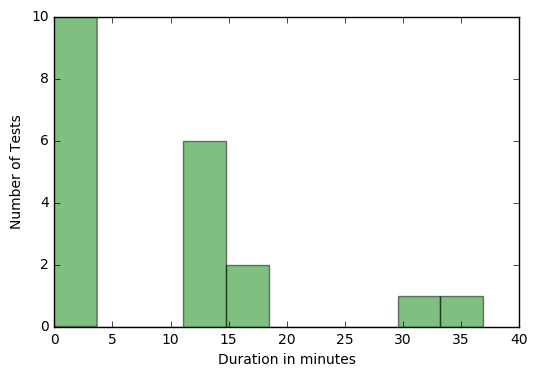

In [25]:
#Plotting histogram to depict frequencies for different time durations
num_bins = 10
n, bins, patches = plt.hist(df1['Duration'], num_bins, facecolor = 'green', alpha = 0.5)
plt.xlabel('Duration in minutes')
plt.ylabel('Number of Tests')
plt.show()